In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import model
import dataSeismic as data

In [7]:
cinn = model.MNIST_cINN(0)
cinn.cuda()
state_dict = {k:v for k,v in torch.load('output/mnist_cinn.pt').items() if 'tmp_var' not in k}
cinn.load_state_dict(state_dict)

cinn.eval()


MNIST_cINN(
  (cinn): ReversibleGraphNet(
    (module_list): ModuleList(
      (0): None
      (1): Flatten()
      (2): PermuteRandom()
      (3): GLOWCouplingBlock(
        (s1): Sequential(
          (0): Linear(in_features=402, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=784, bias=True)
        )
        (s2): Sequential(
          (0): Linear(in_features=402, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=784, bias=True)
        )
      )
      (4): PermuteRandom()
      (5): GLOWCouplingBlock(
        (s1): Sequential(
          (0): Linear(in_features=402, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=784, bias=True)
        )
        (s2): Sequential(
          (0): Linear(in_features=402, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=784, bias=True)
  

In [10]:
def show_samples(label):
    '''produces and shows cINN samples for a given label (0-9)'''

    N_samples = 100
    l = torch.cuda.LongTensor(N_samples)
    l[:] = label

    z = 1.0 * torch.randn(N_samples, model.ndim_total).cuda()

    # no gradients
    with torch.no_grad():
        samples = cinn.reverse_sample(z, l).cpu().numpy()
        samples = data.unnormalize(samples)

    full_image = np.zeros((28*10, 28*10))

    for k in range(N_samples):
        i, j = k // 10, k % 10
        full_image[28 * i : 28 * (i + 1),
                   28 * j : 28 * (j + 1)] = samples[k, 0]

    full_image = np.clip(full_image, 0, 1)
    plt.figure(figsize=(15, 15))
    plt.title(F'Generated digits for c={label}')
    plt.imshow(full_image, vmin=0, vmax=1, cmap='gray')

def val_loss():
    '''prints the final validiation loss of the model'''

    with torch.no_grad():
        z, log_j = cinn(data.val_x, data.val_l)
        nll_val = torch.mean(z**2) / 2 - torch.mean(log_j) / model.ndim_total

    print('Validation loss:')
    print(nll_val.item())


Validation loss:
-2.1275510787963867


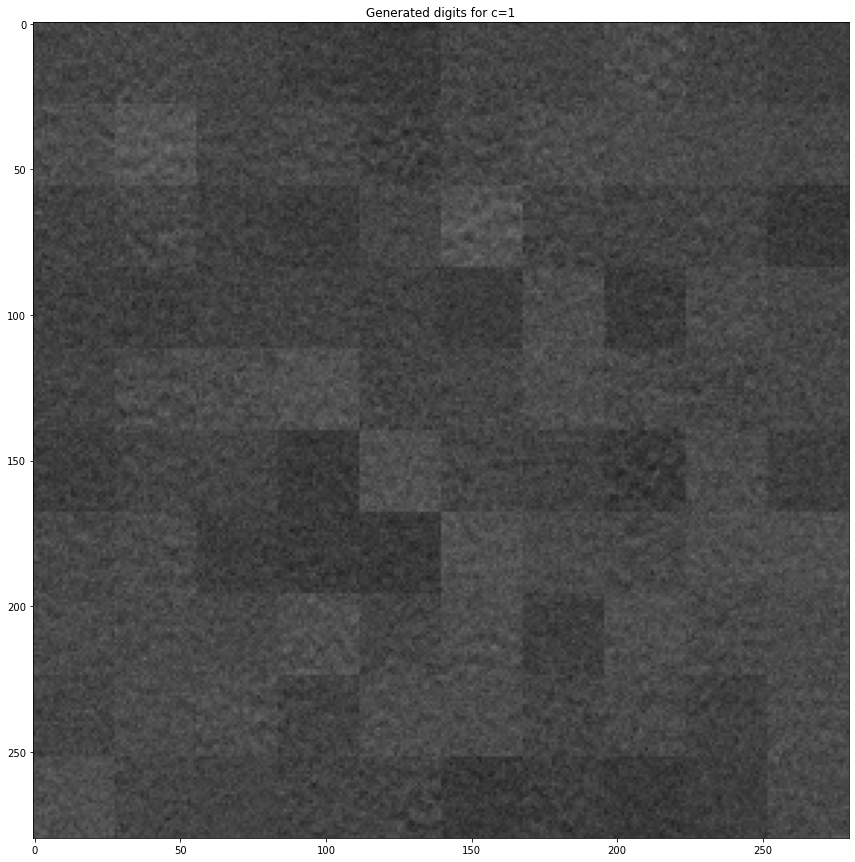

In [11]:
val_loss()
show_samples(1)
plt.show()
